## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_mouse_study_data = pd.merge(mouse_metadata, study_results, on ="Mouse ID")


# Display the data table for preview
combined_mouse_study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the different Mouse ID.
combined_mouse_study_data["Mouse ID"].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [6]:
# Checking the number of mice.
combined_count = len(combined_mouse_study_data["Mouse ID"].unique())
combined_count

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicated_ID = combined_mouse_study_data.loc[combined_mouse_study_data.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
Duplicated_ID

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.

Duplicate_MouseID_data = pd.DataFrame(combined_mouse_study_data.loc[combined_mouse_study_data["Mouse ID"] == "g989"])
Duplicate_MouseID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

Clean_DataFrame = pd.DataFrame(combined_mouse_study_data.loc[combined_mouse_study_data["Mouse ID"] != "g989"])
Clean_DataFrame 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
len(Clean_DataFrame["Mouse ID"].unique())

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

GroupedMean = Clean_DataFrame.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
GroupedMedian = Clean_DataFrame.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
Groupedvariance = Clean_DataFrame.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
Grouped_std_dev = Clean_DataFrame.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
Grouped_SEM = Clean_DataFrame.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
#Grouped_SEM #print to check the values

# Assemble the resulting series into a single summary dataframe.

summary_table = {
    
    "Mean Tumor Volume" : GroupedMean,
    "Median Tumor Volume" : GroupedMedian,
    "Tumor Volume Variance" : Groupedvariance,
    "Tumor Volume Std. Dev." : Grouped_std_dev,
    "Tumor Volume Std. Err." : Grouped_SEM   
    
}

summary_tableDF = pd.DataFrame(summary_table)
summary_tableDF

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

#Example: result = df.groupby('Courses')['Fee'].aggregate(['min','max'])


AggregatedForm = Clean_DataFrame.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
AggregatedForm 

#check to see how you can put "Tumor Volume (mm3)" on top

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

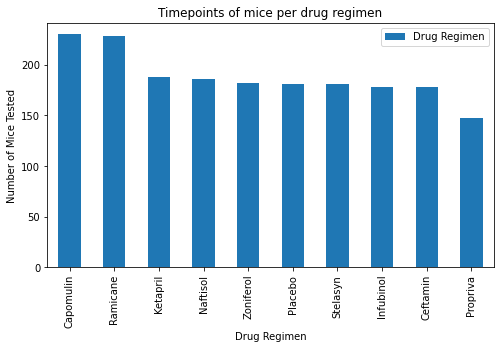

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Number_of_mice_per_drug_regimen = Clean_DataFrame["Drug Regimen"].value_counts()
#Number_of_mice_per_drug_regimen

NewChart = pd.DataFrame(Number_of_mice_per_drug_regimen)
NewChart

NewChart.plot(kind ="bar", figsize = (8, 4.5))

plt.title("Timepoints of mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Mice Tested')

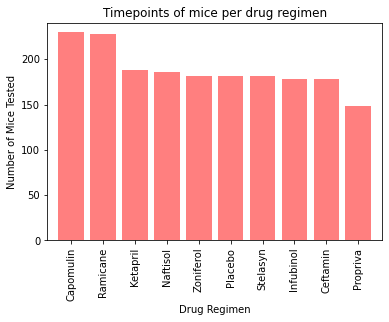

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#NewChart , print to see the values, inorder to put them in variables
Drug_Regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol","Placebo", "Stelasyn", "Infubinol","Ceftamin", "Propriva"]
Number_of_mice_per_drug_regimen = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(Number_of_mice_per_drug_regimen))
#x_axis, print to check the array 

# Create a bar chart based upon the above data
plt.bar(x_axis, Number_of_mice_per_drug_regimen, color="r", alpha = 0.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen, rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(Number_of_mice_per_drug_regimen)+10)

# Give the chart a title, x label, and y label
plt.title("Timepoints of mice per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")




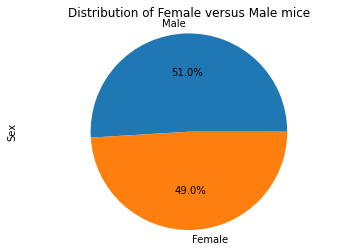

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_versus_male_distribution = Clean_DataFrame["Sex"].value_counts()
#female_versus_male_distribution

Distribution_pie = female_versus_male_distribution.plot(kind="pie", y='"Sex"',autopct="%1.1f%%", title=("Distribution of Female versus Male mice"))

Distribution_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
